# Uploading the Kaggle API Token
In this cell, you will upload your Kaggle API token to authenticate and access the Kaggle dataset.
The `kaggle.json` file, which contains your API credentials, should be downloaded from your Kaggle account.
To download it, go to your Kaggle account settings, scroll to the API section, and click 'Create New API Token'.
Once you have your `kaggle.json` file, click the 'Browse' button below to upload it to this notebook environment.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pietrocaforio","key":"8ef236fe68fa0af6008fd8432d3e4117"}'}

# Setting Up Kaggle API Credentials
After uploading your `kaggle.json` file, this cell will run commands to set up the environment
variables so that the Kaggle API can use these credentials. This includes making a `.kaggle`
directory at the root, copying the `kaggle.json` file into this directory, and setting the
appropriate permissions for the file.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the Wildfire Dataset
This cell will handle the downloading of the LAST version of the wildfire dataset from Kaggle.
Once executed, the dataset will be downloaded
and saved to the current working directory in Colab.

In [ ]:
!kaggle datasets download -d elmadafri/the-wildfire-dataset

100% 9.94G/9.94G [04:13<00:00, 36.7MB/s]
100% 9.94G/9.94G [04:13<00:00, 42.0MB/s]


# Unzipping the Dataset
After downloading the dataset, this cell will unzip the dataset. The dataset comes in a
compressed `.zip` file format to save space. Running the command below will extract the
files into a directory that you can then work with in the notebook.

In [ ]:
!unzip the-wildfire-dataset.zip

Archive:  the-wildfire-dataset.zip
  inflating: the_wildfire_dataset_2n_version/test/fire/19196558588_267f24b847_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/20960888741_8c4be2c1df_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26131736898_9e6a8cd68f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26549039025_b4cce14ec7_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27002088114_aa5cc7f353_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27389369514_cd30397ac2_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27951228213_2dd961ac1f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27968020506_5f1a59f2a5_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28020330864_d7a2429a7e_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28347651877_ce21ed134e_o.png  
  inflating: the_wi

## Setting Up Data Loaders

Before we can start training our model, we need to load our image data into a format that's usable by TensorFlow. This is done by using the `tf.keras.utils.image_dataset_from_directory` function, which conveniently handles images stored in a directory structure.

Here's what we are setting up in this cell:

1. **Directory Paths**: We define the base directory where our dataset is located. Within this base directory, we should have three subdirectories corresponding to our training, validation, and test sets, respectively.

2. **Image Loading Parameters**: We set the batch size and image size. The batch size is the number of images that the model will process at one time during training, and the image size is the dimensions to which all images will be resized.

3. **Data Loaders**: We create data loaders for the training, validation, and test datasets. These loaders will read the images from disk, apply the specified preprocessing, and arrange them into batches.

Note: The `label_mode` is set to 'binary' which indicates that our problem is a binary classification task. If you have more than two classes, change this parameter to 'categorical'.

The `shuffle` parameter is set to `True` for the training dataset to ensure that the model does not learn anything from the order of the images. It's not necessary to shuffle the validation and test sets, but doing so does not harm and ensures that any evaluation of the model is done on a random sample of the data.

After running this cell, `train_dataset`, `val_dataset`, and `test_dataset` will be ready for use in the model training and evaluation steps.

In [ ]:
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

In [ ]:
files.upload()

Saving 20_representative_images-20240321T115419Z-001.zip to 20_representative_images-20240321T115419Z-001.zip


In [ ]:
!unzip 20_representative_images-20240321T115419Z-001.zip

Archive:  20_representative_images-20240321T115419Z-001.zip
  inflating: 20_representative_images/fire/52334291005_ebfa94a6fa_o.jpg  
  inflating: 20_representative_images/fire/52334288775_075ab36aa1_o.jpg  
  inflating: 20_representative_images/fire/52328523518_7dacd6a0e0_o.jpg  
  inflating: 20_representative_images/fire/52333856041_2ecd6fac7c_o.jpg  
  inflating: 20_representative_images/fire/52334092953_07848e4170_o.jpg  
  inflating: 20_representative_images/nofire/52305444500_43ccccaed2_o.jpg  
  inflating: 20_representative_images/fire/52334093933_07479705b4_o.jpg  
  inflating: 20_representative_images/fire/52332440535_48e7104229_o.jpg  
  inflating: 20_representative_images/fire/52328522783_9ce93cfb70_o.jpg  
  inflating: 20_representative_images/nofire/52305446390_7faa38c97f_o.jpg  
  inflating: 20_representative_images/nofire/52305384958_4a8684783e_o.jpg  
  inflating: 20_representative_images/nofire/52305446105_c1c8e5888a_o.jpg  
  inflating: 20_representative_images/nofire

In [87]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# Define directory paths and constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
learning_rate_initial = 0.01

# Define the directory paths for the training, validation, and test sets
base_dir = '/content/the_wildfire_dataset_2n_version'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Load the datasets using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'# Use 'binary' because there are only two classes
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset = train_dataset.map(remap_labels)
val_dataset = val_dataset.map(remap_labels)
test_dataset = test_dataset.map(remap_labels)

Found 1887 files belonging to 2 classes.
Found 402 files belonging to 2 classes.
Found 410 files belonging to 2 classes.


In [143]:
hidden_dir = "/content/20_representative_images"
#Load Hidden Dataset and augment it
hidden_train_dataset = tf.keras.utils.image_dataset_from_directory(
    hidden_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'# Use 'binary' because there are only two classes
)
hidden_train_dataset = hidden_train_dataset.map(remap_labels)

Found 20 files belonging to 2 classes.


#Check for class imbalance

In [ ]:
count0=0
count1=0
for sample,labels in train_dataset:
  for label in labels:
    if label == 0:
      count0 = count0+1
    else:
      count1 = count1+1
print(count0)
print(count1)

1157
730


In [ ]:
count0=0
count1=0
for sample,labels in val_dataset:
  for label in labels:
    if label == 0:
      count0 = count0+1
    else:
      count1 = count1+1
print(count0)
print(count1)

246
156


In [ ]:
count0=0
count1=0
for sample,labels in test_dataset:
  for label in labels:
    if label == 0:
      count0 = count0+1
    else:
      count1 = count1+1
print(count0)
print(count1)

251
159


# Augmentation through kerasCV and tensorflow preprocessing layers
We have chosen to augment the dataset in order to address possible problems that are typical of digital pictures and also to make the model more robust (and tackle possible overfitting problems, that's why I've decided to not add a dense layer and just leave the GAP as it's known to make the network less prone to overfitting and robust)

In [ ]:
%pip install keras_cv

In [89]:
import keras_cv

In [90]:
#define augmentations, we start with randaugment
rand_augment=keras_cv.layers.RandAugment(
    (0,255),
    augmentations_per_image=3,
    magnitude=0.001,
)
def preprocess(image, label):
    image = rand_augment(image)
    return image, label

train_dataset_randaug = train_dataset.map(preprocess)


In [91]:
data_augmentation = tf.keras.Sequential([
  tfkl.RandomFlip("horizontal"),
  tfkl.RandomRotation(0.2),
  tfkl.GaussianNoise(0.1) #To simulate possible large ISO and hence sensor noise
])

In [92]:
train_augment = train_dataset.map(lambda x,y: (data_augmentation(x),y))

In [144]:
hidden_train_augment = hidden_train_dataset.map(lambda x,y: (data_augmentation(x),y))

In [94]:
hidden_augment = tf.keras.Sequential([
    tfkl.RandomCrop(112,112)
])

In [145]:
hidden_train_crop = hidden_train_augment.map(lambda x,y: (data_augmentation(x),y))

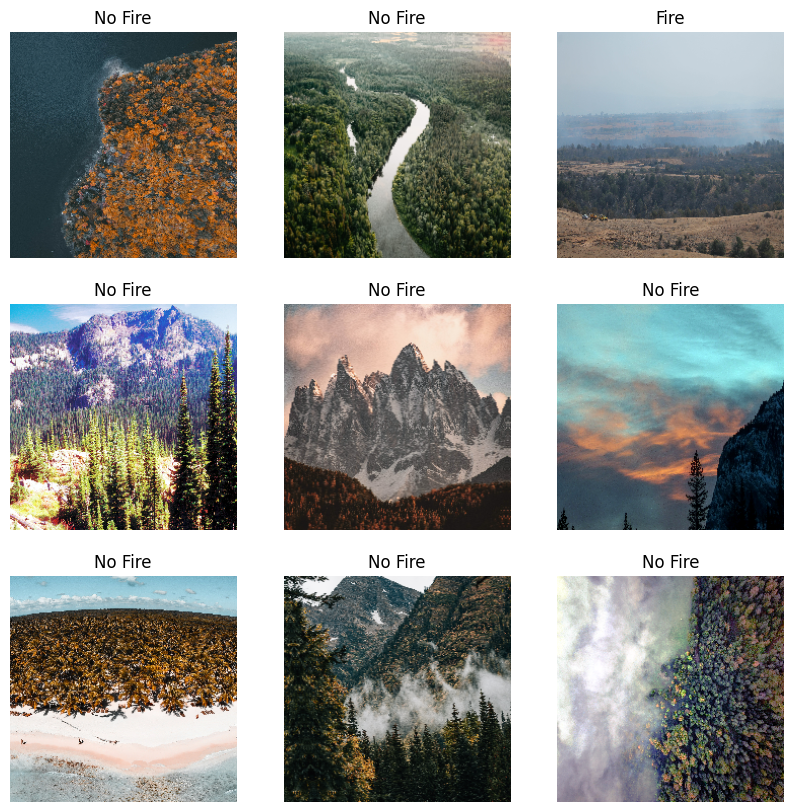

In [96]:
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(min(len(image_batch), 9)):  # Display up to 9 images from the batch
        ax = plt.subplot(3, 3, n+1)
        plt.imshow(image_batch[n] / 255.0)  # Make sure the pixel values are in [0,1] range
        if label_batch[n]:
            plt.title("Fire")
        else:
            plt.title("No Fire")
        plt.axis("off")

image_batch, label_batch = next(iter(train_dataset_randaug))
show_batch(image_batch, label_batch)


In [97]:
train_dataset = train_dataset.concatenate(train_dataset_randaug)
train_dataset = train_dataset.concatenate(train_augment)
#train_dataset = train_dataset.concatenate(hidden_train_dataset)
#train_dataset = train_dataset.concatenate(hidden_train_augment)
#train_dataset = train_dataset.concatenate(hidden_train_crop)

In [98]:
train_dataset.shuffle(1024)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>

## Optimizing Data Loading

In this cell, we optimize the data loading process for our training, validation, and test datasets. `AUTOTUNE` is a TensorFlow feature that allows the dataset to dynamically adjust the number of images it processes simultaneously, based on the current system conditions.

By calling the `prefetch` method with `buffer_size=AUTOTUNE`, we enable the input pipeline to fetch batches in the background while the model is training. This helps in reducing the time the model has to wait for the data and can improve overall training speed.

Prefetching is a best practice that can significantly improve computational efficiency.

In [99]:
# Configure the datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

## Setting Up the Base Model with EfficientNetB0

To leverage the power of transfer learning, we're using a pre-trained model, EfficientNetB0, as the starting point for our own image classification task. Pre-trained on ImageNet, EfficientNetB0 has learned rich feature representations for a wide range of images which can be beneficial for our specific task.
After pre-training and feature extraction, we might want to fine-tune the base model to better suit our specific task. Fine-tuning can lead to significant improvements in accuracy by slightly adjusting the weights of the pre-trained model.


In [100]:
# Define the model
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True  # Fine-tune the base model

In [ ]:
base_model.summary()

In [ ]:
len(base_model.layers)

238

## Fine-Tuning the Model

Fine-tuning is a powerful technique to optimize the pre-trained model for our specific task, allowing us to adjust the higher-order feature representations in the pre-trained model to make them more relevant for the classification of our images.

In [102]:
# Freeze all the layers before the `fine_tune_at` layer
#We have 238 layers in the backbone model, let's fine tune 1/4 of it
fine_tune_at = 50
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [103]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

## Incorporating a Global Average Pooling Layer

After extracting features using the base model, we often have a high-dimensional feature map for each image. To simplify the model and reduce its complexity, we can apply a Global Average Pooling (GAP) layer. The GAP layer reduces each feature map to a single value by calculating the average of all values in the feature map. This process significantly reduces the dimensionality and prepares the data for the final classification layer. To consolidate the features extracted by the base model into a more manageable form, we introduce a Global Average Pooling 2D (GAP) layer. This layer reduces the dimensions of the feature maps from the base model by calculating the average value for each feature map channel. This step is crucial for reducing the model's complexity and computational load without sacrificing the essential information needed for accurate predictions.


In [104]:
inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
x = base_model(x, training=True)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Use 'sigmoid' for binary classification

## Building the Complete Model

With all the components ready, we now assemble the complete model. This model incorporates preprocessing, the pre-trained base model for feature extraction, pooling to condense the features, and a prediction layer for output. Additionally, we include a Dropout layer to reduce overfitting by randomly setting input units to 0 at a rate of 0.2 during training.

In [105]:
# Build the model
model = models.Model(inputs, outputs)

## Compiling the Model

With our model architecture defined, the next step is to compile the model. Compiling the model prepares it for training by specifying the loss function, optimizer, and metrics to use for evaluation.


In [106]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate_initial/10, weight_decay=5e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [107]:
callbacks=[
    tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, mode='max'),
    tfk.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=15, min_lr=1e-5, mode='max')
]

## Training the Model

Now that our model is compiled, we're ready to start the training process. Training the model involves feeding it our training dataset and letting it learn to predict the correct labels. During training, the model will also be validated using a separate dataset to monitor its performance on data it has not seen before.



In [108]:

# Fit the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    callbacks = callbacks,
    epochs = 10
)


Epoch 1/10
177/177 [==============================] - 344s 2s/step - loss: 0.2487 - accuracy: 0.9013 - val_loss: 0.2406 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 2/10
177/177 [==============================] - 326s 2s/step - loss: 0.1449 - accuracy: 0.9467 - val_loss: 0.3332 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 3/10
177/177 [==============================] - 328s 2s/step - loss: 0.1163 - accuracy: 0.9585 - val_loss: 0.3250 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 4/10
177/177 [==============================] - 321s 2s/step - loss: 0.0925 - accuracy: 0.9677 - val_loss: 0.3169 - val_accuracy: 0.9104 - lr: 0.0010
Epoch 5/10
177/177 [==============================] - 320s 2s/step - loss: 0.0730 - accuracy: 0.9717 - val_loss: 0.3823 - val_accuracy: 0.9104 - lr: 0.0010
Epoch 6/10
177/177 [==============================] - 317s 2s/step - loss: 0.0993 - accuracy: 0.9633 - val_loss: 0.2543 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 7/10
177/177 [==============================] - 316s 2s/st

## Saving Your Trained Model to Google Drive

After training your model, it's important to save it so that you can share it with the hackathon organizers and use it for further evaluation. In the following cell, we mount your Google Drive for easy file access and save your trained model directly to it. This ensures that your model is stored securely and can be accessed from anywhere, anytime.

In [109]:
from google.colab import drive
drive.mount('/content/drive')

# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'my_model.h5'
save_path = f'/content/drive/My Drive/{model_name}'

# Save your model
model.save(save_path)
print(f'Model saved to {save_path}')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/my_model.h5


## Evaluating the Trained Model on the test dataset

With your model now trained and saved, the next critical step is to assess its performance on a new set of data. This evaluation will provide you with valuable insights into how well your model generalizes to unseen examples, reflecting its potential effectiveness in real-world scenarios. In the following code cell, we will use the .evaluate() method, which will output the model's accuracy and loss on the dataset. It's important to note that this step is crucial for understanding your model's strengths and areas for improvement.

In [110]:

# Evaluate the model
model.evaluate(test_dataset)

13/13 [==============================] - 26s 698ms/step - loss: 0.2233 - accuracy: 0.9390


[0.2232532799243927, 0.9390243887901306]

## Important: Protect Your API Key

Before submitting this notebook, please ensure that you remove your `kaggle.json` file from the notebook environment. To do this, you can simply delete the cell that uploaded the `kaggle.json` file and any cells that may have outputted its contents.

Furthermore, before pushing this notebook to GitHub or any other public repository, ensure that your API key is not visible or stored in the code. Do not share or expose your credentials in any way within this notebook.

**To remove the kaggle.json file from your Colab environment, you can use the following command:**

```python
!rm -rf ~/.kaggle/kaggle.json


In [155]:
!rm -rf ~/.kaggle/kaggle.json


#Fine Tune the model on the augmented hidden dataset
After having trained the model on the entire dataset we decided to fine tune the model (with a very low learning rate) on the new (and augmented) 20 hidden images provided.
Other solutions were taken into account (like doing some sort of weighted loss) that were not implemented in the end because of time constraints.

In [147]:
fine_tune_model = tfk.models.load_model(f'/content/drive/My Drive/{model_name}')

In [148]:
hidden_train_set = hidden_train_dataset.concatenate(hidden_train_augment)
hidden_train_set = hidden_train_dataset.concatenate(hidden_train_crop)


In [149]:
fine_tune_at = 190
for layer in fine_tune_model.get_layer("efficientnetb0").layers[:fine_tune_at]:
    layer.trainable = False
#for i, layer in enumerate(fine_tune_model.get_layer("efficientnetb0").layers):
   #print(i, layer.name, layer.trainable)


In [150]:
fine_tune_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=learning_rate_initial/1000, weight_decay=5e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [151]:
callbacks=[
    tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, mode='max'),
    tfk.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=15, min_lr=1e-5, mode='max')
]

In [152]:
hidden_train_set.shuffle(32)
# Fit the model
history = fine_tune_model.fit(
    hidden_train_set,
    validation_data=val_dataset,
    callbacks = callbacks,
    epochs = 10
)

Epoch 1/10
2/2 [==============================] - 34s 23s/step - loss: 1.1488 - accuracy: 0.7000 - val_loss: 0.4080 - val_accuracy: 0.8881 - lr: 1.0000e-05
Epoch 2/10
2/2 [==============================] - 21s 21s/step - loss: 1.1520 - accuracy: 0.7000 - val_loss: 0.3783 - val_accuracy: 0.9129 - lr: 1.0000e-05
Epoch 3/10
2/2 [==============================] - 20s 20s/step - loss: 1.5996 - accuracy: 0.6750 - val_loss: 0.3853 - val_accuracy: 0.9030 - lr: 1.0000e-05
Epoch 4/10
2/2 [==============================] - 20s 20s/step - loss: 1.4748 - accuracy: 0.7000 - val_loss: 0.3242 - val_accuracy: 0.9055 - lr: 1.0000e-05
Epoch 5/10
2/2 [==============================] - 20s 20s/step - loss: 1.3488 - accuracy: 0.6000 - val_loss: 0.2903 - val_accuracy: 0.9104 - lr: 1.0000e-05
Epoch 6/10
2/2 [==============================] - 20s 20s/step - loss: 1.3866 - accuracy: 0.7500 - val_loss: 0.3389 - val_accuracy: 0.9080 - lr: 1.0000e-05
Epoch 7/10
2/2 [==============================] - 20s 20s/step -

In [154]:
model_name = "fine_tune_hidden.h5"
fine_tune_model.save(f'/content/drive/My Drive/{model_name}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
